In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
df= pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [4]:
df.shape

(545, 13)

In [5]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [7]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [10]:
df['price'] = df['price'].astype('float')

In [11]:
df.dtypes

price               float64
area                  int64
bedrooms              int64
bathrooms             int64
stories               int64
mainroad             object
guestroom            object
basement             object
hotwaterheating      object
airconditioning      object
parking               int64
prefarea             object
furnishingstatus     object
dtype: object

In [12]:
categorical_columns= ['mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea']

In [13]:
# one-hot encoding for furnishingstatus column
df= pd.get_dummies(df, columns=['furnishingstatus'], drop_first= True)

In [14]:
#encoding for categorical columns
le= LabelEncoder()
for column in categorical_columns:
    df[column]= le.fit_transform(df[column].str.lower())

In [15]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000.0,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000.0,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000.0,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000.0,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000.0,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [16]:
df['furnishingstatus_semi-furnished'].value_counts()

0    318
1    227
Name: furnishingstatus_semi-furnished, dtype: int64

In [17]:
df['furnishingstatus_unfurnished'].value_counts()

0    367
1    178
Name: furnishingstatus_unfurnished, dtype: int64

In [18]:
# furnished houses
furnished_count = (df['furnishingstatus_semi-furnished'] == 0) + (df['furnishingstatus_unfurnished'] == 0)


In [19]:
furnished_count.value_counts()

True    545
dtype: int64

There are:
- 227 semi-furnished house.
- 178 unfurnished houses.
- 545 furnished houses.

In [20]:
corr = df.corr(numeric_only=True) 

In [21]:
corr

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.063656,-0.280587
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.006156,-0.142278
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.050040,-0.126252
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.029834,-0.132107
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.003648,-0.082972
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.011450,-0.133123
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.005821,-0.099023
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.050284,-0.117935
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.063819,-0.059194
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.053179,-0.094086


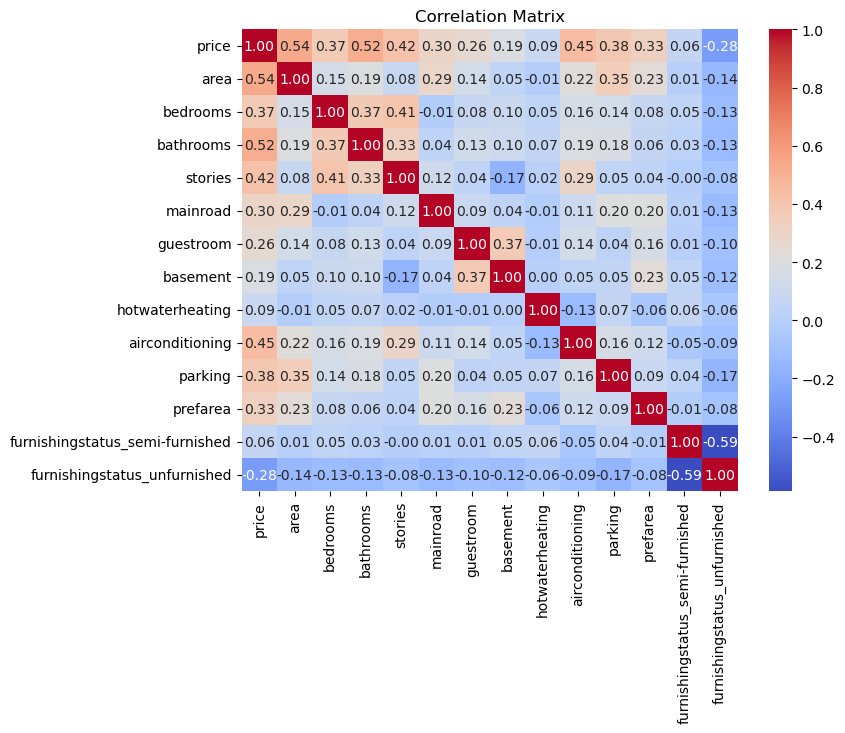

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot= True,cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [23]:
#correlation btn furnishingstatus columns and price
corrs = df[['furnishingstatus_unfurnished',
            'furnishingstatus_semi-furnished',
            'price']].corr()

print(corrs['price'].sort_values(ascending=False))

price                              1.000000
furnishingstatus_semi-furnished    0.063656
furnishingstatus_unfurnished      -0.280587
Name: price, dtype: float64


- annot=True means show the correlation values (numbers) inside the squares.

- cmap='coolwarm' gives the plot a blue-to-red color range — blue for low/negative correlations, red for high/positive ones.

Cmap -means colorMap. It can be 'RdBu'- Red → white → blue, 'bwr'-Blue → white → red (simpler, 'seismic'-Intense blue ↔ red.
Also, fmt=".2f" -format numbers with 2 decimal places (.2f = float with 2 decimals)

### Check for Multicollinearity and Addressing it

1. After creating a correlation heatmap, look for pairs of independent variables (your features, not the target) that have:

- a correlation coefficient above +0.8 or below –0.8. They are highly correlated → possible multicollinearity.

2. Use VIF (Variance Inflation Factor)- used to find which features are redundant.

   Most Common: To solve drop the variable with the highest VIF, and recalculate until all are < 5 (or 10).
- VIF = 1: No correlation
- 1 < VIF < 5: Moderate correlation (usually acceptable)
- 5 < VIF < 10: High correlation (concerning)
- VIF > 10: Severe multicollinearity (action needed!)

3. Combine correlated variables- If two features convey the same info, you can merge them i.e take their average, sum, or ratio.

   This helps retain information while removing redundancy.

4. Dimensionality reduction (PCA)- Use Principal Component Analysis (PCA) to create new uncorrelated features (components).

   PCA transforms correlated variables into fewer, independent components.

5. Regularization methods- If you don’t want to drop variables but want to reduce the effect of collinearity:
- Use regularized regression models, such as Ridge Regression (L2) and Lasso Regression (L1)
  
6. Use tree-based models such as 

- Decision Tree

- Random Forest

- XGBoost

- Gradient Boosting

These models aren’t affected much by multicollinearity — they automatically decide which feature to split on and ignore redundancy.



In [24]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 1️⃣ Define features (exclude target)
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
        'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
        'parking', 'prefarea', 'furnishingstatus_semi-furnished',
        'furnishingstatus_unfurnished']]

# 2️⃣ Add constant for intercept
X = add_constant(X)

# 3️⃣ Compute VIF for each column
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 4️⃣ Display
print(vif_data)

                            Feature        VIF
0                             const  33.384521
1                              area   1.325250
2                          bedrooms   1.369477
3                         bathrooms   1.286621
4                           stories   1.478055
5                          mainroad   1.172728
6                         guestroom   1.212838
7                          basement   1.323050
8                   hotwaterheating   1.041506
9                   airconditioning   1.211840
10                          parking   1.212837
11                         prefarea   1.149196
12  furnishingstatus_semi-furnished   1.578233
13     furnishingstatus_unfurnished   1.674139


All the VIF values (except const) are below 2.

That means the features are not strongly correlated with each other.

- Hence no multicollinearity problem

In [25]:
#PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Define X (without price)
X = df.drop('price', axis=1)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=None)  # keep all to inspect variance
X_pca = pca.fit_transform(X_scaled)

In [26]:
X_pca

array([[ 3.12282842, -1.78029642,  0.01474129, ...,  0.62461939,
        -0.37282978, -0.696418  ],
       [ 4.94822107, -3.37303602,  1.67695389, ...,  1.01756972,
         0.36856551, -0.51748621],
       [ 2.7432079 ,  1.30327221, -0.47669534, ...,  0.08862503,
         1.22816788,  0.50177111],
       ...,
       [-2.4960703 , -0.48489116, -0.85588636, ...,  0.01151947,
        -0.28736181,  0.26902163],
       [-2.24467251, -0.04457799,  0.91266814, ...,  0.23142551,
        -0.4174451 , -1.47828654],
       [-1.64133814, -1.32321828, -0.22805594, ..., -0.2095698 ,
        -0.09891081,  0.29013697]])

In [27]:
print(pca.explained_variance_ratio_)

[0.18997389 0.12098787 0.11539005 0.09814425 0.08342919 0.06841146
 0.06359535 0.05676463 0.04998266 0.04822389 0.04409163 0.0319304
 0.02907474]


In [28]:
pca.explained_variance_ratio_.sum()

0.9999999999999999

In [29]:
np.cumsum(pca.explained_variance_ratio_)

array([0.18997389, 0.31096176, 0.42635181, 0.52449606, 0.60792525,
       0.6763367 , 0.73993205, 0.79669668, 0.84667934, 0.89490323,
       0.93899486, 0.97092526, 1.        ])

- Each row → represents one observation (like one house).
- Each column → represents one principal component.
- PCA transformation preserved all the variance (information) in your dataset.

In [30]:
#choose components to keep
pca = PCA(n_components=0.95)   # keep enough components to explain 95% of variance
X_reduced = pca.fit_transform(X_scaled)

- Use the X_reduced for modelling now.

#### Correlation Analysis Summary

##### Strongest Positive Correlations with Price:

- Area (0.54): 
  Moderate-to-strong positive relationship. Larger properties command higher prices, making this the  strongest predictor in the dataset.
- Bathrooms (0.52): 
  More bathrooms significantly increase home value, possibly reflecting luxury and convenience.
- Stories (0.42): 
  Multi-story homes tend to be priced higher, though the relationship is weaker than area or bathrooms.

##### Moderate Positive Correlations with Price:

- Airconditioning (0.45):
  Homes with AC are notably more expensive, likely reflecting comfort features or regional climate needs.
- Parking (0.38):
  More parking spaces correlate with higher prices, though less strongly than structural features.
- Bedrooms (0.37): 
  Has weaker than bathrooms. More bedrooms increase price, but not as dramatically as other features.
- Prefarea (0.33): 
  Location in a preferred area moderately boosts price.
- Mainroad (0.30): 
  Main road access has a modest positive effect on price.
- Guestroom (0.26): 
  Presence of a guestroom shows a weak-to-moderate positive correlation.

##### Weak or No Correlation with Price:
- Hotwaterheating (0.09): 
  Heating type is not a meaningful price predictor.
- Furnishingstatus_semi-furnished (-0.06): 
  Semi-furnished status has almost no impact on price.

#### Top Predictors 
The strongest predictors are:
- area (0.54) 
- bathrooms (0.52) 
- airconditioning(0.45)
- stories (0.42)
- Parking (0.38)
- Bedrooms (0.37)



#### Observations:
- Bedrooms vs. Bathrooms: Bathrooms (0.52) are more predictive than bedrooms (0.37). This suggests buyers value bathroom count more than bedroom count—possibly reflecting quality over quantity.
- Airconditioning: The high correlation (0.45) suggests this is either a luxury feature or a regional necessity that significantly impacts value.
- Parking: At 0.38, parking spaces are more important than bedrooms for price prediction.
- Furnishing: The negative correlation for unfurnished homes (-0.28) indicates furnished properties command a premium, though the effect is modest.
- Prefarea: At 0.33, preferred area matters, but less than you might expect compared to other features.

#### Distributions

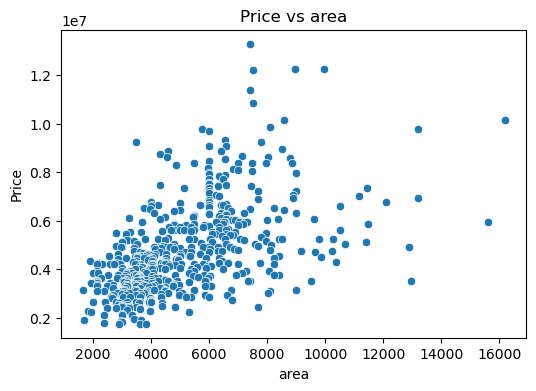

<Figure size 640x480 with 0 Axes>

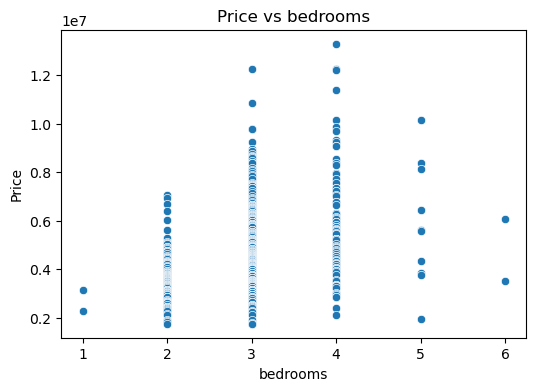

<Figure size 640x480 with 0 Axes>

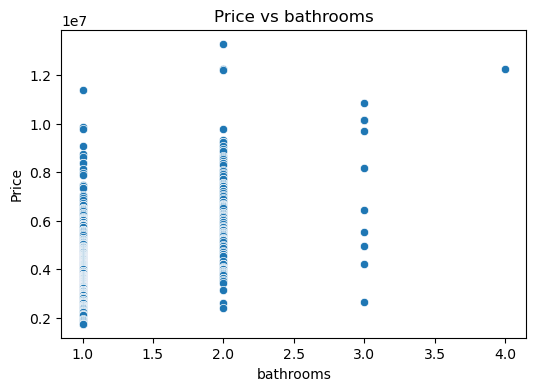

<Figure size 640x480 with 0 Axes>

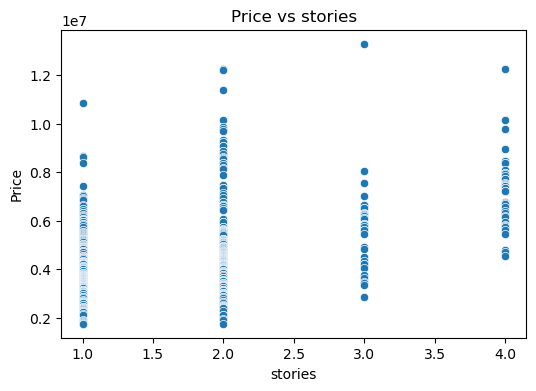

<Figure size 640x480 with 0 Axes>

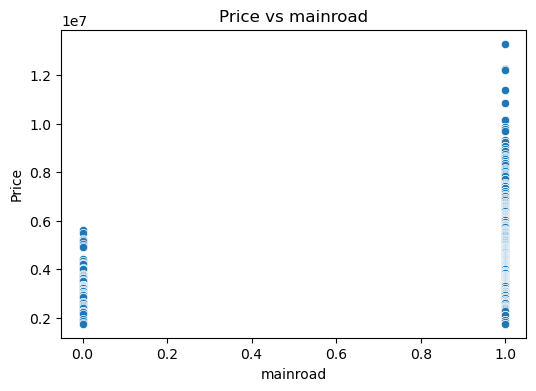

<Figure size 640x480 with 0 Axes>

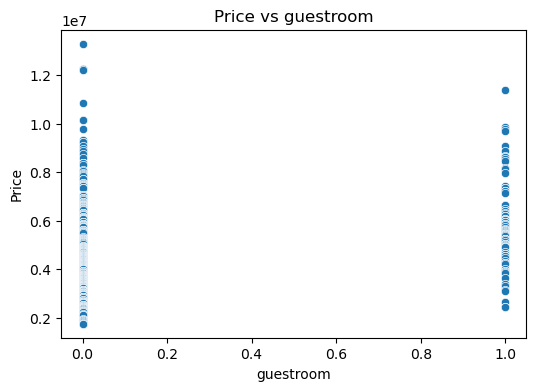

<Figure size 640x480 with 0 Axes>

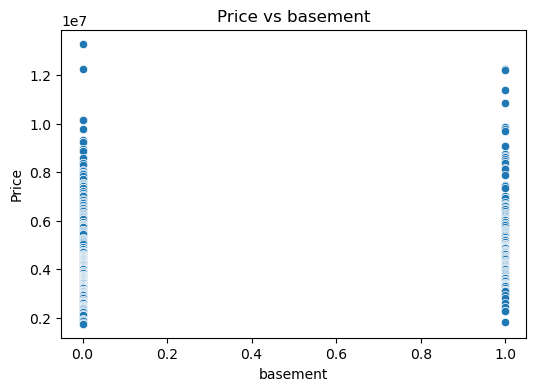

<Figure size 640x480 with 0 Axes>

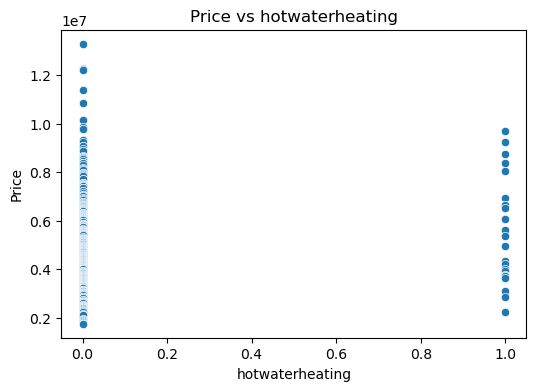

<Figure size 640x480 with 0 Axes>

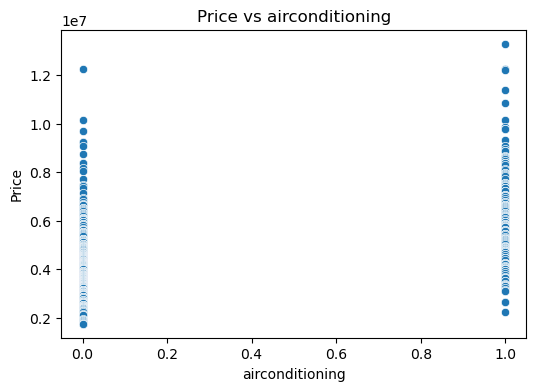

<Figure size 640x480 with 0 Axes>

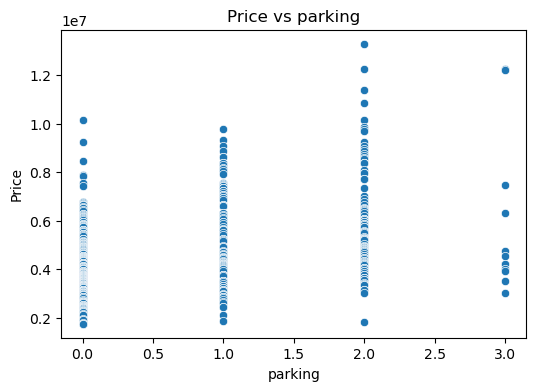

<Figure size 640x480 with 0 Axes>

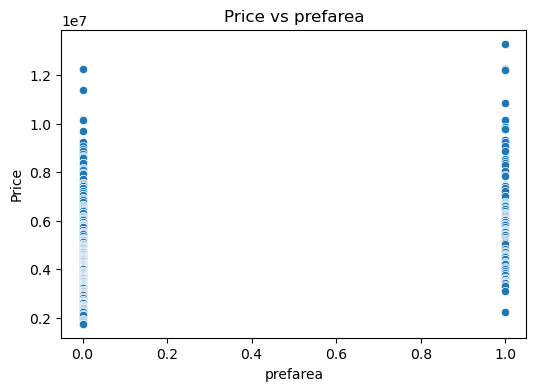

<Figure size 640x480 with 0 Axes>

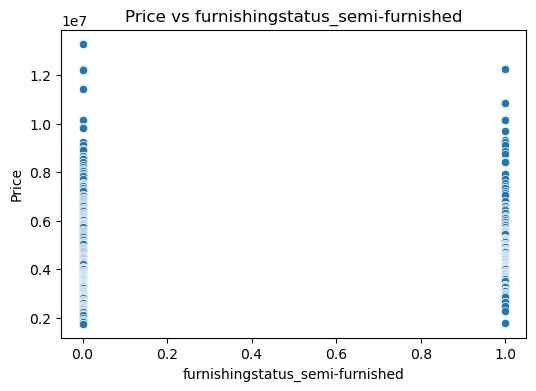

<Figure size 640x480 with 0 Axes>

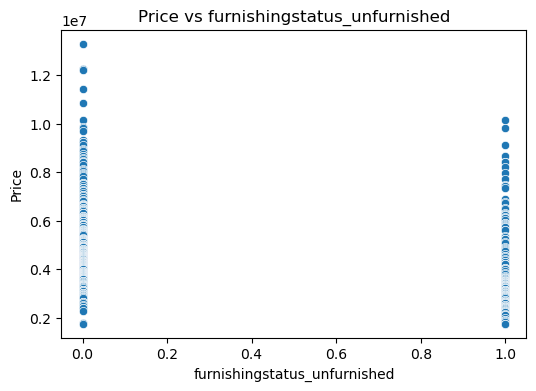

<Figure size 640x480 with 0 Axes>

In [31]:
# target variable 
target = 'price'

# list all features except the target
features = df.columns.drop(target)

# loop through each feature and plot
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feature], y=df[target])
    plt.title(f'Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()
    # save the figure before showing
    filename = f"pricevs {feature}.png"
    plt.savefig(filename, bbox_inches='tight', dpi=300) 

### Observations
- Area: larger homes have higher prices, with a clear upward trend.
- Bedrooms: Generally more bedrooms  indicate higher prices (peaks at 4 bedrooms, slight decline at 5-6).
- Bathrooms: More number of bathrooms associated with higher prices.
- Stories: More stories generally mean higher prices, though the effect is moderate.
- Mainroad: Properties on main roads are significantly more expensive.
- Guestroom: Homes with guestrooms have  higher prices.
- Basement: Properties with basements are more valuable.
- Hotwaterheating: Homes with hot water heating cost more.
- Airconditioning: AC-equipped homes have higher prices.
- Prefarea: Properties in preferred areas are substantially more expensive.
- Parking: More parking spaces generally mean higher prices.

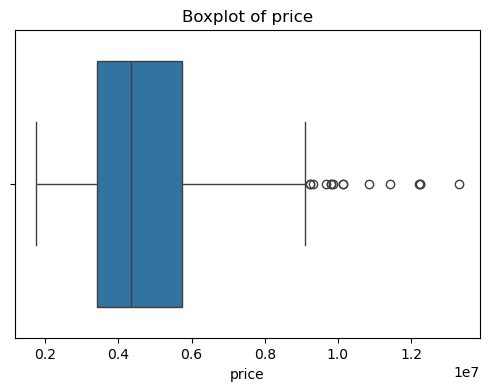

<Figure size 640x480 with 0 Axes>

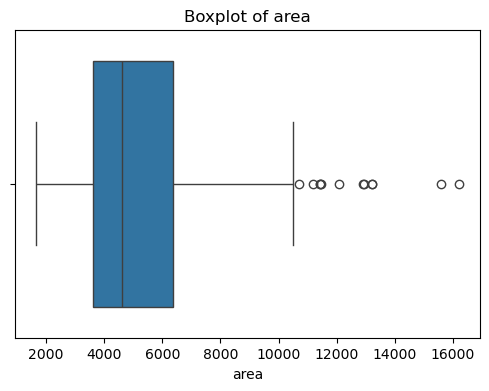

<Figure size 640x480 with 0 Axes>

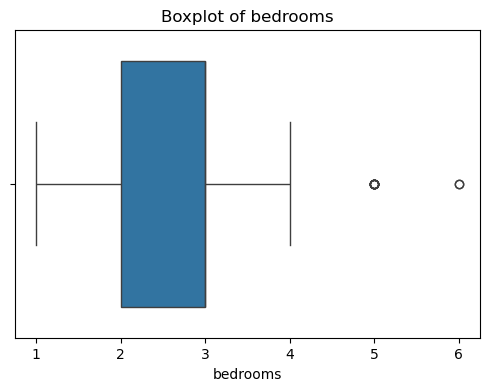

<Figure size 640x480 with 0 Axes>

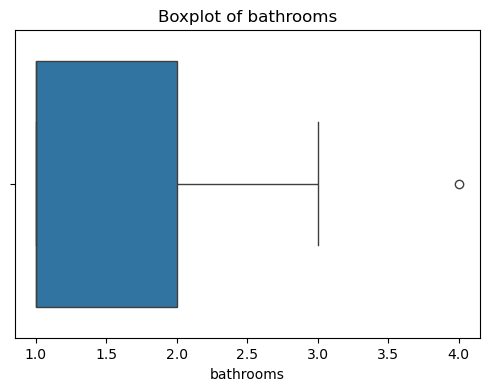

<Figure size 640x480 with 0 Axes>

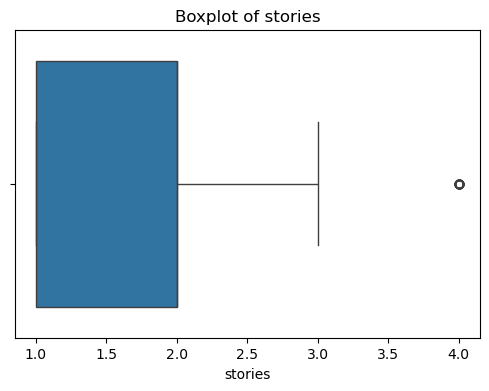

<Figure size 640x480 with 0 Axes>

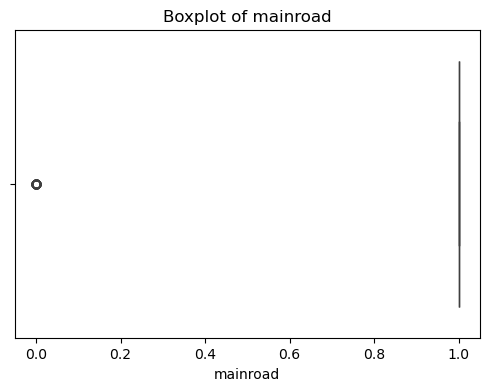

<Figure size 640x480 with 0 Axes>

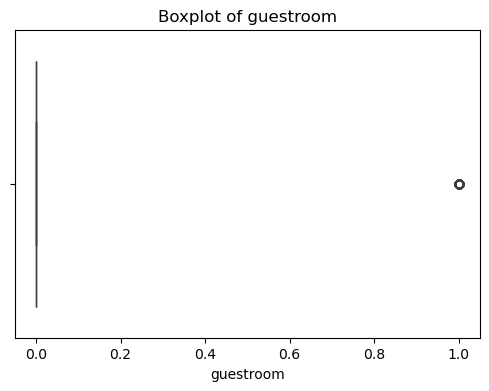

<Figure size 640x480 with 0 Axes>

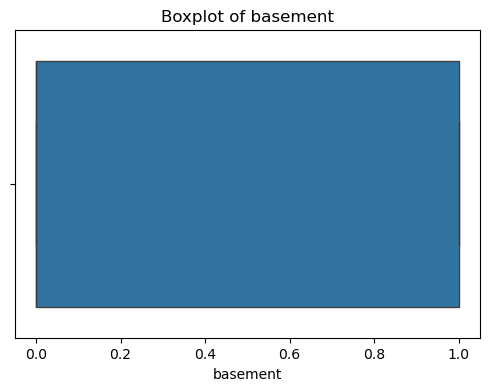

<Figure size 640x480 with 0 Axes>

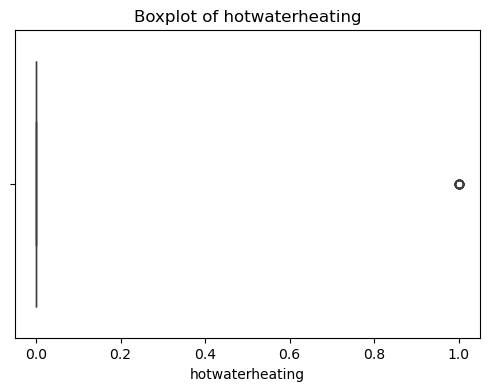

<Figure size 640x480 with 0 Axes>

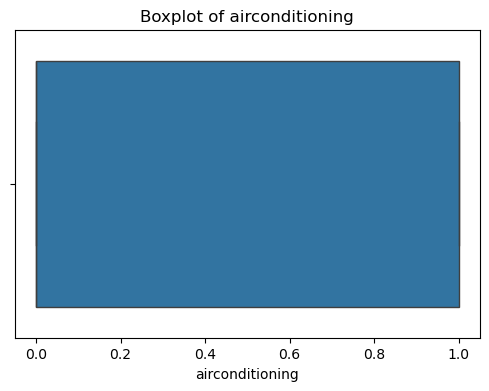

<Figure size 640x480 with 0 Axes>

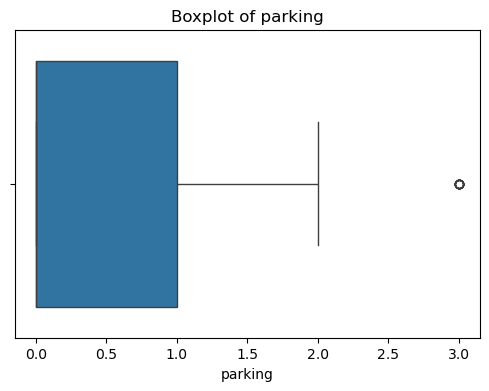

<Figure size 640x480 with 0 Axes>

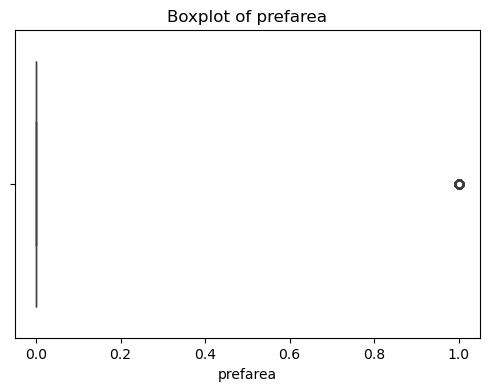

<Figure size 640x480 with 0 Axes>

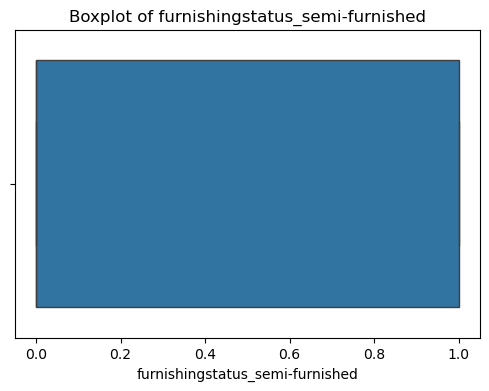

<Figure size 640x480 with 0 Axes>

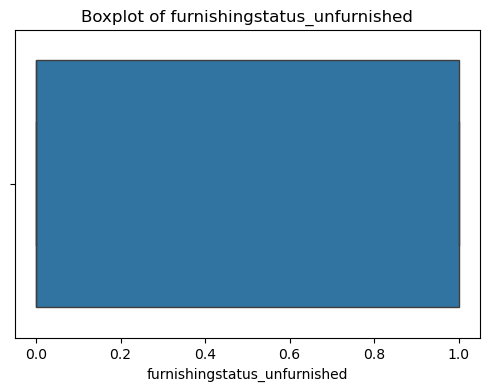

<Figure size 640x480 with 0 Axes>

In [32]:
# Boxplot
num_cols = df.select_dtypes(include=['int64', 'float64', 'int32', 'uint8']).columns
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
    # Save the plot as a PNG file
    plt.savefig(f'boxplot_{col}.png', bbox_inches='tight')

- Most homes are modest: 3 bedrooms, 2 bathrooms, 2 stories, ~5,000 sq ft.
- Luxury features are rare: Large areas, many bedrooms/bathrooms, multiple parking spaces.
- Location matters: Mainroad access is common; preferred areas are exclusive majority of the houses are not in preferred areas.
- Amenities vary: AC, basement, and furnishing are relatively balanced across properties.
- Premium features: Guestrooms and hot water heating are uncommon luxury additions.

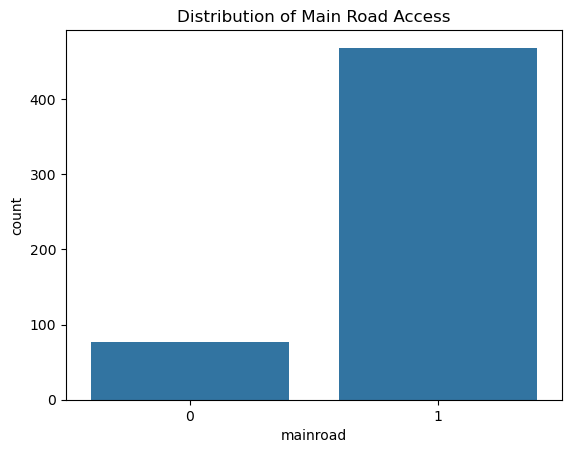

In [33]:
sns.countplot(data=df, x='mainroad')
plt.title('Distribution of Main Road Access')
# Save the plot as a PNG file
plt.savefig('countplot_mainroad.png', bbox_inches='tight')

- Most of the houses are located near he main road, meaning they are easily accessible.

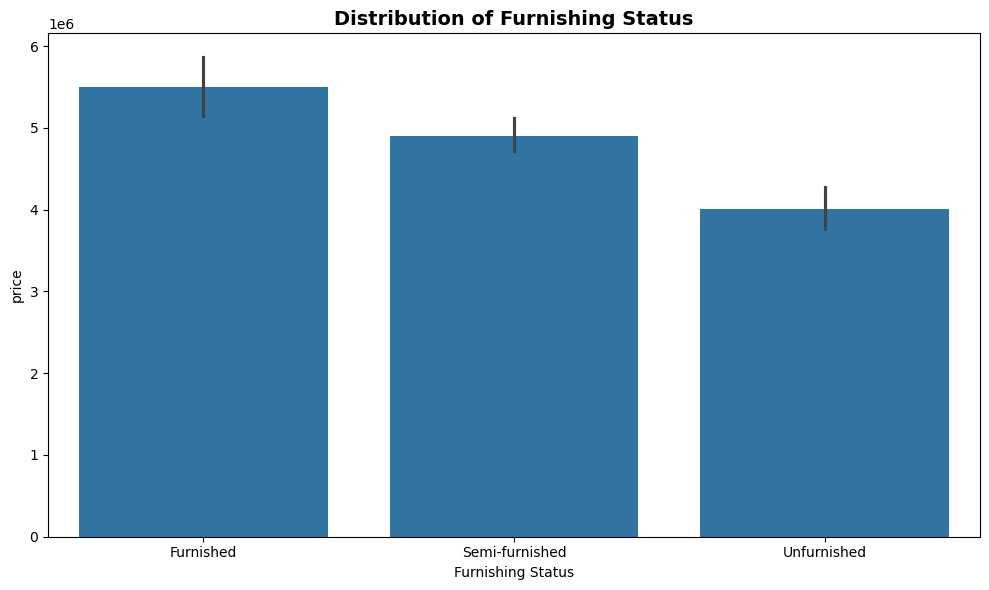

<Figure size 640x480 with 0 Axes>

In [34]:
# Recreate the original categorical column
def get_furnishing_status(row):
    if row['furnishingstatus_unfurnished'] == 1:
        return 'Unfurnished'
    elif row['furnishingstatus_semi-furnished'] == 1:
        return 'Semi-furnished'
    else:
        return 'Furnished'

df['furnishingstatus'] = df.apply(get_furnishing_status, axis=1)
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='furnishingstatus', y='price', order=['Furnished', 'Semi-furnished', 'Unfurnished'])
plt.title('Distribution of Furnishing Status', fontsize=14, fontweight='bold')
plt.xlabel('Furnishing Status')
plt.ylabel('price')
plt.tight_layout()
plt.show()
# Save the plot
plt.savefig('barplot_furnishing_status.png', bbox_inches='tight')

- The houses that are fully furnished command a higher price as compared to the ones semi-furnished and unfurnished. 
- he unfurnished houses have the lowest prices.
- This means people are likely to buy the semi-furnished and unfurnished houses as compared to the ones furnished .

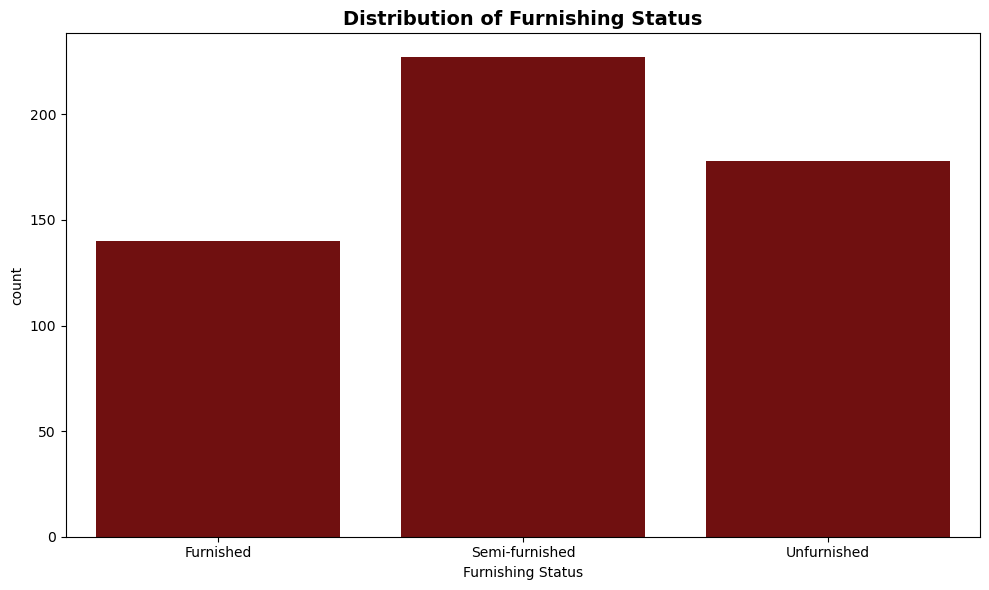

<Figure size 640x480 with 0 Axes>

In [35]:
df['furnishingstatus'] = df.apply(get_furnishing_status, axis=1)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='furnishingstatus', order=['Furnished', 'Semi-furnished', 'Unfurnished'], color= 'maroon')
plt.title('Distribution of Furnishing Status', fontsize=14, fontweight='bold')
plt.xlabel('Furnishing Status')
plt.ylabel('count')
plt.tight_layout()
plt.show()
# Save the plot
plt.savefig('barplot_furnishing_status.png', bbox_inches='tight')

- There are more semi-furnished houses as compared to unfurnished and furnished houses.
- This could indicate a preference in location and luxury needs. It could indicate different class of the people.

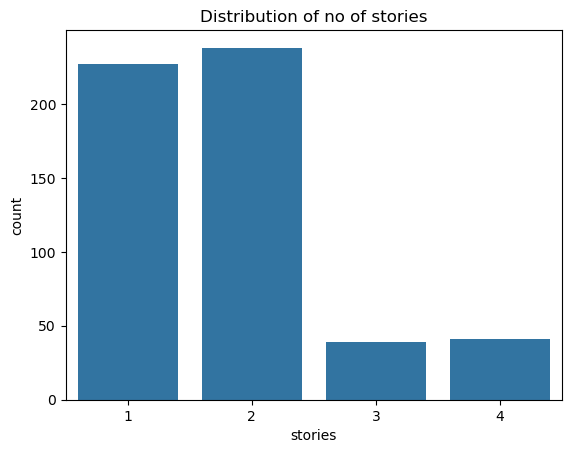

In [36]:
sns.countplot(data=df, x='stories')
plt.title('Distribution of no of stories')
# Save the plot as a PNG file
plt.savefig('countplot_stories.png', bbox_inches='tight')

- Most houses have 1-2 stories, with very few houses with 3-4 stories.
- It could mean most people prefer houses with 1-2 stories and they could be fairly priced as compared to the ones with 3-4 stories.

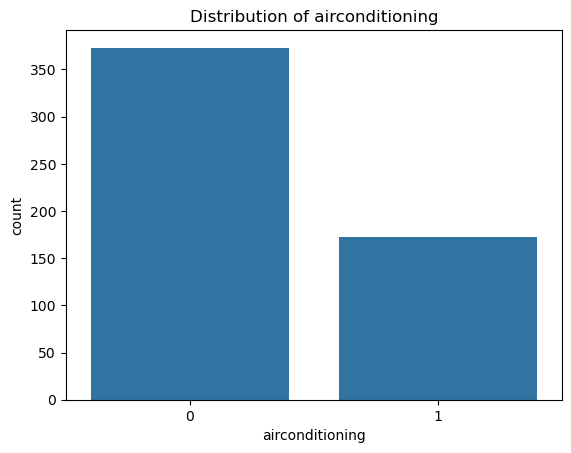

In [37]:
sns.countplot(data=df, x='airconditioning')
plt.title('Distribution of airconditioning')
# Save the plot as a PNG file
plt.savefig('countplot_airconditioning.png', bbox_inches='tight')

- Airconditioning is a luxury and most houses do not have the AC fixed. 

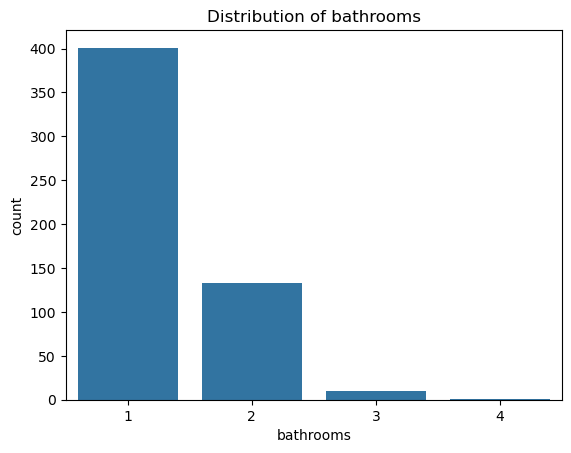

In [38]:
sns.countplot(data=df, x='bathrooms')
plt.title('Distribution of bathrooms')
# Save the plot as a PNG file
plt.savefig('countplot_bathrooms.png', bbox_inches='tight')

- Most of the houses have 1-2 bathrooms with only a few with 3-4 bathrooms. 
- This could indicate a price range btn houses with 1-2 bathrooms and those with 3-4 bathrooms. 

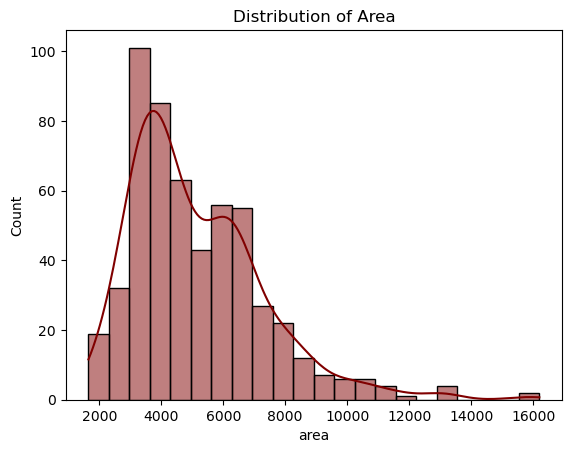

In [39]:
sns.histplot(data=df, x='area', color= 'maroon', kde=True)
plt.title('Distribution of Area')
# Save the plot as a PNG file
plt.savefig('histogram_area.png', bbox_inches='tight')

- The Area distribution is right skewed.
- There are very few houses with large area or occupying big spaces, with most houses ranging from small to medium spaces.
- Most common houses range from 3000-4000Sqft area size(100).
- Anything above 8,000 sq ft is uncommon and premium and coud be considered as luxury properties.

#### Relationship Analysis

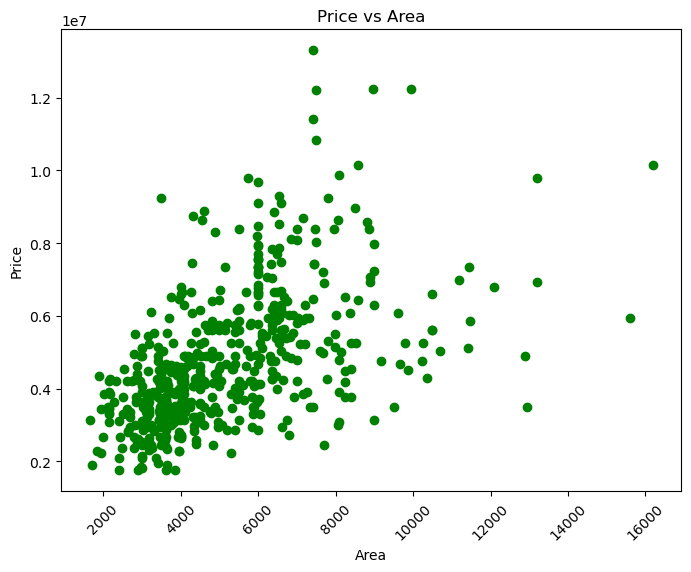

<Figure size 640x480 with 0 Axes>

In [40]:
plt.figure(figsize=(8,6))
plt.scatter(df['area'], df['price'], color= 'green')
plt.title('Price vs Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()
# Save the plot
plt.savefig('scatter_price_vs_area.png', bbox_inches='tight')


- As area increases, price generally increases.
- Larger houses cost more and are few .
- Most house sizes range between 2000- 6000 Sqft.
- The scatter shows area isn't the ONLY factor that affects the price.

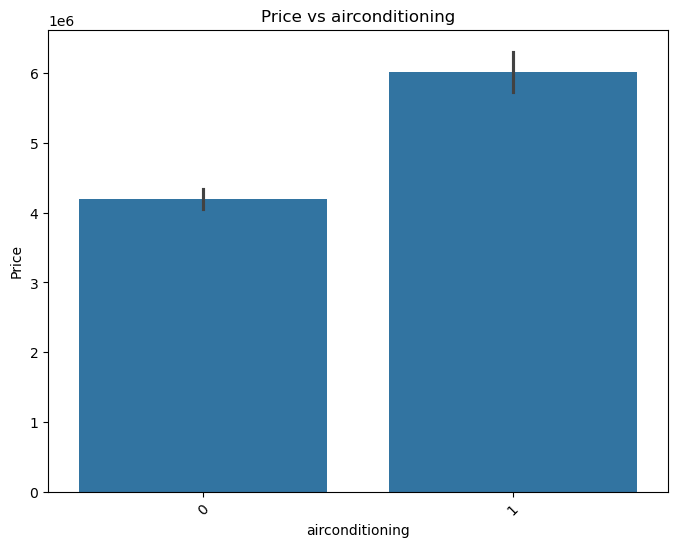

<Figure size 640x480 with 0 Axes>

In [41]:
plt.figure(figsize=(8,6))
sns.barplot(x= df['airconditioning'], y= df['price'])
plt.title('Price vs airconditioning')
plt.xlabel('airconditioning')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()
# Save the plot
plt.savefig('barplot_price_vs_airconditioning.png', bbox_inches='tight')

- Aircondioning is a luxury feature in a house and thus houses with AC features are highly priced compared to the ones without.


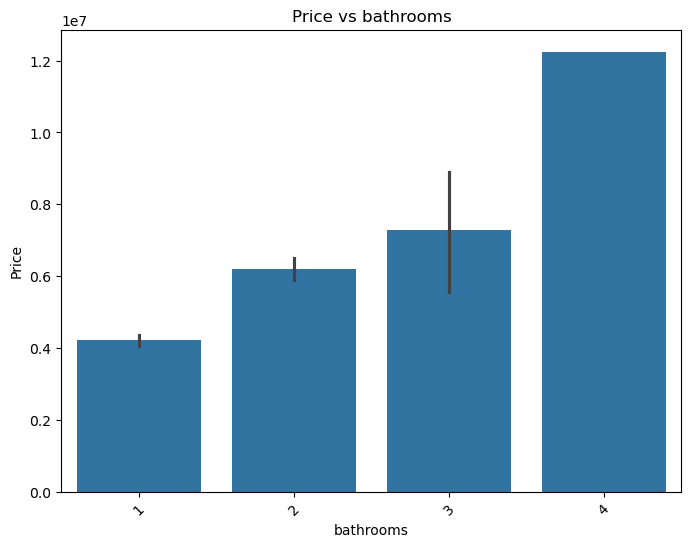

<Figure size 640x480 with 0 Axes>

In [42]:
plt.figure(figsize=(8,6))
sns.barplot(x= 'bathrooms', y= 'price',data=df)
plt.title('Price vs bathrooms')
plt.xlabel('bathrooms')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()
# Save the plot
plt.savefig('barplot_price_vs_bathrooms.png', bbox_inches='tight')

- The number of bathrooms affects the pricing of houses. The higher the number of bathrooms the higher the price of the house.
- This could be considered as a luxury feature for the larger houses.

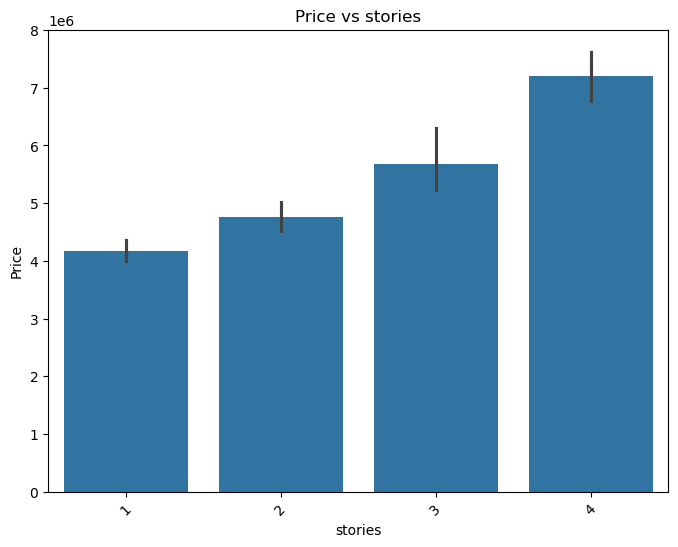

<Figure size 640x480 with 0 Axes>

In [43]:
plt.figure(figsize=(8,6))
sns.barplot(x= 'stories', y= 'price',data=df, estimator='mean')
plt.title('Price vs stories')
plt.xlabel('stories')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()
plt.savefig('barplot_Price vs stories.png', bbox_inches='tight')

- The houses with a high number of stories are highly priced.
- This means they are likely to be associated with the large houses.

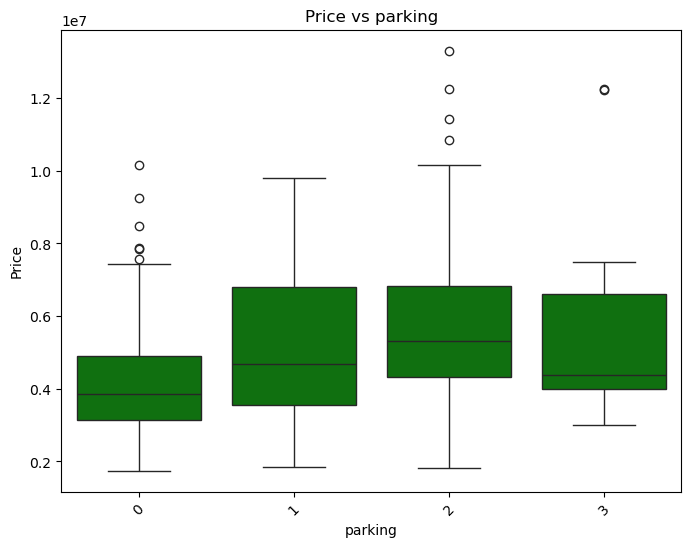

<Figure size 640x480 with 0 Axes>

In [44]:
plt.figure(figsize=(8,6))
sns.boxplot(x= df['parking'], y= df['price'] ,color= 'green')
plt.title('Price vs parking')
plt.xlabel('parking')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()
plt.savefig('boxplot_Price vs parking.png', bbox_inches='tight')

- House with more parking spaces are likey to be highly priced.
- Most houses do not have parking spaces while those with parking have 2-3 spaces.

In [45]:
df['parking'].value_counts()

0    299
1    126
2    108
3     12
Name: parking, dtype: int64

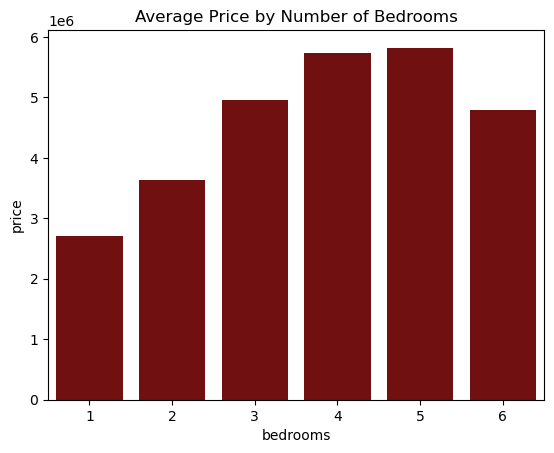

<Figure size 640x480 with 0 Axes>

In [46]:
sns.barplot(x='bedrooms', y='price', data=df, estimator='mean',errorbar=None, color='maroon')
plt.title('Average Price by Number of Bedrooms')
plt.show()
# Save the plot
plt.savefig('barplot_price_vs_bedrooms.png', bbox_inches='tight')

In [47]:
df['bedrooms'].value_counts()

3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64

- Most of the houses have 2-3  bedrooms.
- The houses with 5&6 bedrooms are few, meaning most people are likely to prefer house with 3 bedrooms.

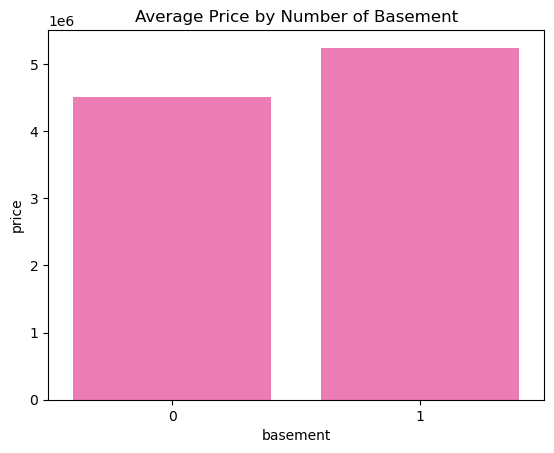

In [48]:
sns.barplot(x='basement', y='price', data=df, estimator='mean',errorbar=None, color='hotpink')
plt.title('Average Price by Number of Basement')
# Save the plot
plt.savefig('barplot_price_vs_basement.png', bbox_inches='tight')
plt.show()


- Houses with basement structures are costly as compared to the ones without.
- Thus could be considered as a luxury feature.

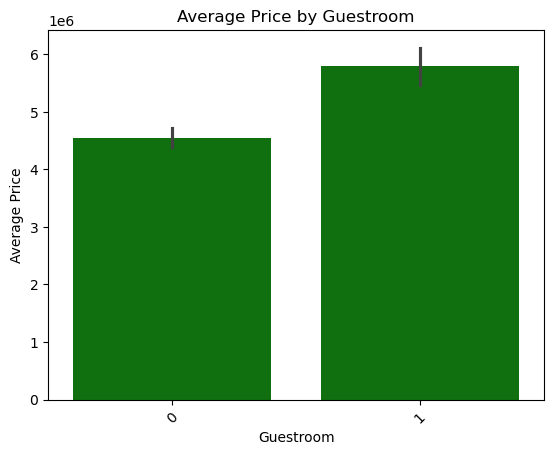

In [49]:
sns.barplot(x='guestroom', y= 'price', estimator='mean', color='green', data=df)
plt.title('Average Price by Guestroom')
plt.xlabel('Guestroom')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.savefig('barplot_Average Price by Guestroom')
plt.show()


- Guestroom feature indicates high prices for the house.
- However, this could be considered as a luxury feature.

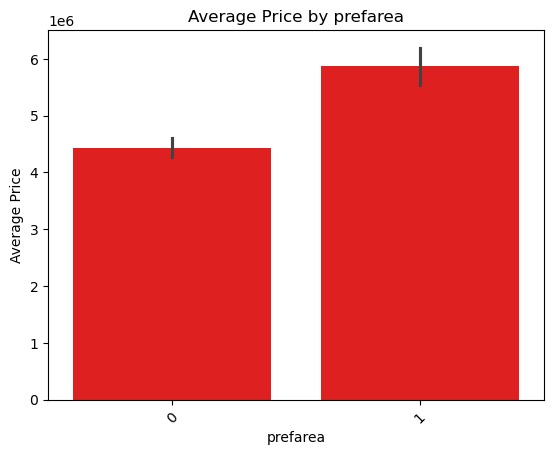

In [50]:
sns.barplot(x='prefarea', y= 'price', estimator='mean', color='red', data=df)
plt.title('Average Price by prefarea')
plt.xlabel('prefarea')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.savefig('barplot_Average Price by prefarea')
plt.show()


- Prefarea could mean premium locations that are highly preferred say because of easy access or quality of amenities.
- Houses in the preferred areas are highly priced. Thus could mean they are in highly competitive locations.

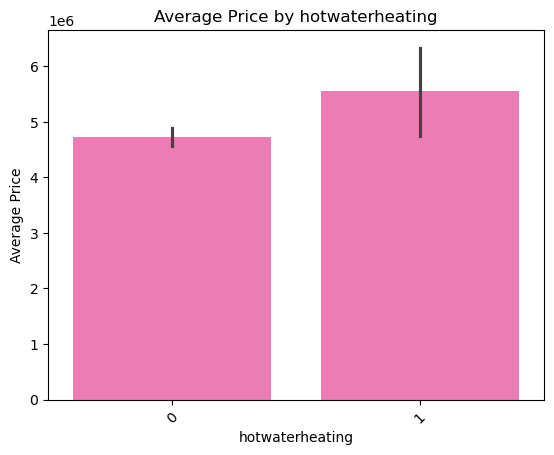

In [51]:
sns.barplot(x='hotwaterheating', y= 'price', estimator='mean', color='hotpink', data=df)
plt.title('Average Price by hotwaterheating')
plt.xlabel('hotwaterheating')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.savefig('barplot_Average Price by hotwaterheating')

plt.show()


- Houses fitted with hotwater heaters are highly priced as compared to those without.
- This feature could be considered as a luxury feature.

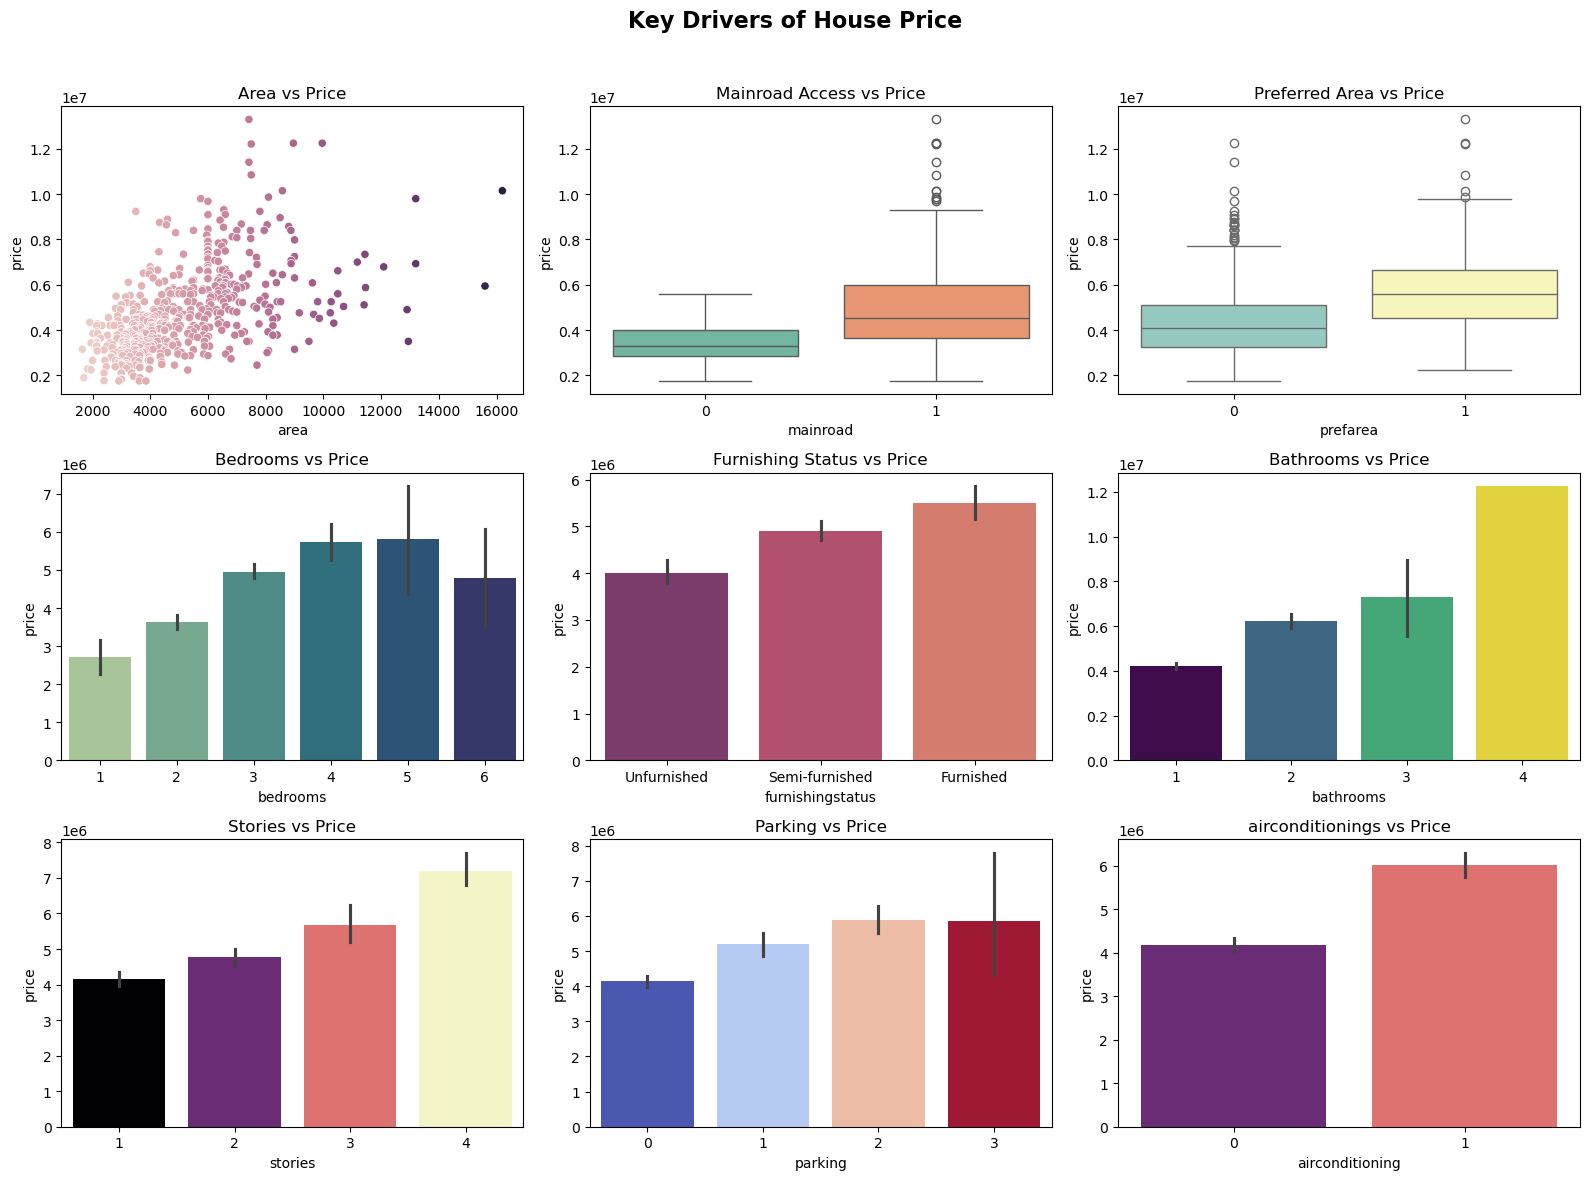

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))

# 1. Area vs Price
plt.subplot(3, 3, 1)
sns.scatterplot(data=df, x='area', y='price', color='green', hue='area', legend=False)
plt.title('Area vs Price')

# 2. Mainroad vs Price
plt.subplot(3, 3, 2)
sns.boxplot(data=df, x='mainroad', y='price', palette='Set2', hue='mainroad', legend=False)
plt.title('Mainroad Access vs Price')

# 3. Preferred Area vs Price
plt.subplot(3, 3, 3)
sns.boxplot(data=df, x='prefarea', y='price', palette='Set3', hue='prefarea', legend=False)
plt.title('Preferred Area vs Price')

# 4. Bedrooms vs Price
plt.subplot(3, 3, 4)
sns.barplot(data=df, x='bedrooms', y='price', palette='crest', hue='bedrooms', legend=False)
plt.title('Bedrooms vs Price')

# 5. Furnishing Status vs Price
plt.subplot(3, 3, 5)
sns.barplot(data=df, x='furnishingstatus', y='price', order=['Unfurnished', 'Semi-furnished', 'Furnished'], palette='flare', hue='furnishingstatus', legend=False)
plt.title('Furnishing Status vs Price')

# 6. Bathrooms vs Price
plt.subplot(3, 3, 6)
sns.barplot(data=df, x='bathrooms', y='price', palette='viridis', hue='bathrooms', legend=False)
plt.title('Bathrooms vs Price')

# 7. Stories vs Price
plt.subplot(3, 3, 7)
sns.barplot(data=df, x='stories', y='price', palette='magma', hue='stories', legend=False)
plt.title('Stories vs Price')

# 8. Parking vs Price
plt.subplot(3, 3, 8)
sns.barplot(data=df, x='parking', y='price', palette='coolwarm', hue='parking', legend=False)
plt.title('Parking vs Price')

# 9. airconditioning vs Price
plt.subplot(3, 3, 9)
sns.barplot(data=df, x='airconditioning', y='price', palette='magma', hue='airconditioning', legend=False)
plt.title('airconditionings vs Price')

plt.suptitle('Key Drivers of House Price', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [53]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_semi-furnished',
       'furnishingstatus_unfurnished', 'furnishingstatus'],
      dtype='object')

In [54]:
# dropping unnecessary columns
df= df.drop(columns=['hotwaterheating','guestroom',
    'basement',
    'furnishingstatus'])

print("\nThe selected features for modelling are:",df.columns)



The selected features for modelling are: Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'airconditioning', 'parking', 'prefarea',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')


In [55]:
df1=df.copy()
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000.0,7420,4,2,3,1,1,2,1,0,0
1,12250000.0,8960,4,4,4,1,1,3,0,0,0
2,12250000.0,9960,3,2,2,1,0,2,1,1,0
3,12215000.0,7500,4,2,2,1,1,3,1,0,0
4,11410000.0,7420,4,1,2,1,1,2,0,0,0


### MODELLING

- DecisionTreeClassifier  is used for classification.ie 'spam' or 'not spam'.
Its used majorly for catgorical data prediction and outputs a class label or class probabilities.It uses measures like gini and entropy for splitting criterion.
- Whereas, DecisionTreeRegressor is used for regression to predict continuous variables like price and scores.
It's output is usually a numerical value/real number. It uses measure like mean squared error or mean absolute error for splitting criterion.


In [56]:
clf= DecisionTreeClassifier()

In [57]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [58]:
from sklearn.tree import DecisionTreeRegressor

In [59]:

reg= DecisionTreeRegressor()
reg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

### Pruning
We have prepruning and post pruning.
- Pre pruning controled by numerous hyperparamers such as : 
   1. max_depth → maximum number of levels

   2. min_samples_split → minimum samples needed to split a node.

   3. min_samples_leaf → minimum samples required in each leaf.

   4. max_leaf_nodes → limit total number of leaves.

   5. min_impurity_decrease → stop splitting when improvement is too small.

- Post pruning controlled by hyperparameter-ccp_alpha - cost_complexity_parameter.

- We use tuning methods to do pruning. Tuning methods include;
  1. GridSearchCV
  2. RandomnSearchCV


In [60]:
# target variable
X = df1.drop('price', axis=1)   
y = df1['price']

In [61]:
# Splitting data into train and test samples
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (436, 10)
X_test shape: (109, 10)
y_train shape: (436,)
y_test shape: (109,)


#### Model 1. DecisionTreeRegressor

In [62]:
#create model
reg= DecisionTreeRegressor(criterion="squared_error", random_state=42)

In [63]:
# train the model
reg.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [64]:
# Make predictions on the training and testing sets:
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

In [65]:
print("y train predicted values:", y_train_pred )
print("y test predicted values:", y_test_pred )


y train predicted values: [ 7367500.  6300000.  3920000.  3430000.  3010000.  4620000.  2432500.
  3010000.  2520000.  3710000.  3703000.  2450000.  4200000.  3640000.
  3640000.  5383000.  1767150.  5250000.  3500000.  6790000.  3920000.
  3920000.  5810000.  5250000.  5950000.  3500000.  2408000.  2660000.
  5285000.  3675000.  4200000.  2275000.  3570000.  4620000.  4200000.
  3087000.  3255000.  8855000.  3640000.  7343000.  4690000.  4305000.
  3640000.  4403000.  4270000.  2940000.  4795000.  8540000.  4235000.
  7700000.  3500000.  3360000.  4970000.  3150000.  5530000.  5880000.
  3710000.  3640000.  8400000.  6083000.  4760000.  3080000.  5243000.
  7245000.  4550000.  8575000.  8960000.  3500000.  6930000.  4613000.
  4340000.  4473000.  3780000.  6300000.  5215000.  5040000.  4515000.
  8645000.  2660000.  3118850.  2782500. 10850000.  6020000.  7560000.
  4123000.  4098500.  9100000.  7455000.  4900000.  3356500. 12215000.
  4382000.  3850000.  7140000.  4970000.  2380000. 

In [66]:
from sklearn.metrics import  mean_squared_error,mean_absolute_error,r2_score

In [67]:
## Evaluating Model performance
print("Before Tuning Performance:")
# Evaluate on training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Evaluate on test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MAE : {train_mae:.2f}")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Train R²  : {train_r2:.3f}")

print(f"Test MAE  : {test_mae:.2f}")
print(f"Test RMSE : {test_rmse:.2f}")
print(f"Test R²   : {test_r2:.3f}")

Before Tuning Performance:
Train MAE : 10837.16
Train RMSE: 71919.16
Train R²  : 0.998
Test MAE  : 1444504.59
Test RMSE : 1984956.94
Test R²   : 0.220


- Poor R² on test sample  as well as the huge variance of errors btn train and test data shows overfitting. Hence the need for tuning. 

In [68]:
#### Hyperparameter Tuning-post pruning
from sklearn.model_selection import GridSearchCV
reg_tuned= DecisionTreeRegressor(criterion="squared_error", random_state=42,max_depth=10,
    min_samples_split=20,min_samples_leaf=10 )
#Get pruning path
path = reg_tuned.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
# Step 2: Define parameter grid (as a dictionary)
parameters_grid = {'ccp_alpha': ccp_alphas}

In [69]:
# Set up grid search
grid_search = GridSearchCV(reg_tuned, parameters_grid, cv=5, scoring='r2',n_jobs=-1,
    verbose=1)
#fit the grid search
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 33 candidates, totalling 165 fits


,estimator,DecisionTreeR...ndom_state=42)
,param_grid,{'ccp_alpha': array([0.0000...04350052e+12])}
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [70]:
#Display best parameters
print("Best ccp_alpha:", grid_search.best_params_['ccp_alpha'])
print("Best Cross-Validation R²:", grid_search.best_score_)

Best ccp_alpha: 14465837182.721672
Best Cross-Validation R²: 0.5029520937275329


In [71]:
#Evaluate on test data
best_tree = grid_search.best_estimator_
y_test_pred = best_tree.predict(X_test)

In [72]:
print("\nTest Set Performance:")
print(f"MAE  :", mean_absolute_error(y_test, y_test_pred))
print(f"RMSE :", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print(f"R²   :", r2_score(y_test, y_test_pred))


Test Set Performance:
MAE  : 1119822.7914490334
RMSE : 1528878.677394776
R²   : 0.5375531654989207


- R² of 0.54 means the model now explains 54% of house price variance indicating a huge improvement from 22%. However, this is not the best.

#### Feature Importance

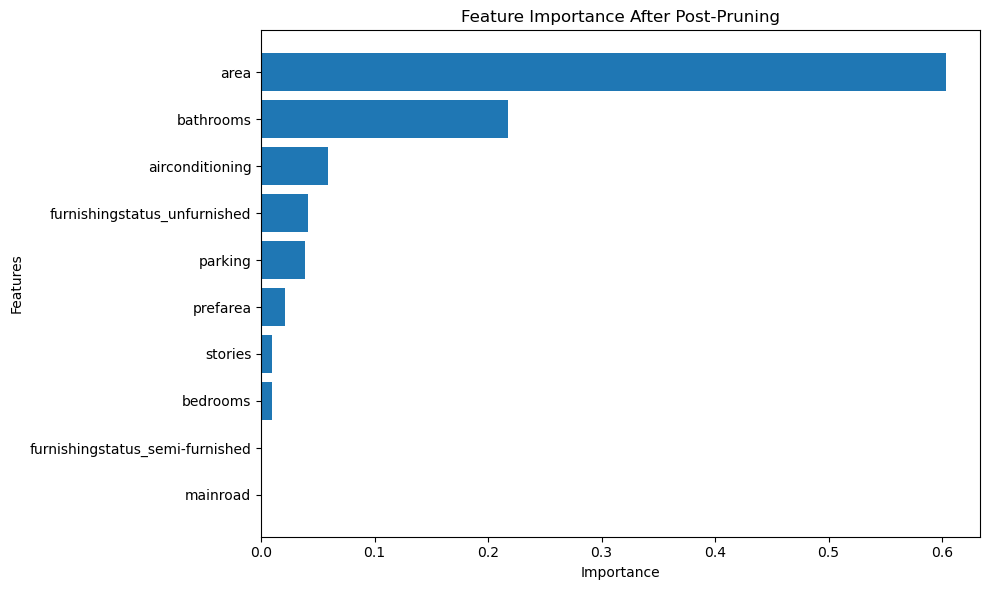

In [73]:
# Get feature importances from best model
feature_importance = best_tree.feature_importances_
feature_names=X.columns
# Create DataFrame and sort
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=True)
# Visualize
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance After Post-Pruning')
plt.tight_layout()
plt.show()

In [74]:
importance_df 

,Feature,Importance
4,mainroad,0.000000
8,furnishingstatus_semi-furnished,0.000000
1,bedrooms,0.009152
3,stories,0.009813
7,prefarea,0.021084
6,parking,0.038729
9,furnishingstatus_unfurnished,0.041000
5,airconditioning,0.059222
2,bathrooms,0.217712
0,area,0.603288


In [75]:
print("List important features are:")
print("1. Mainroad")
print("2. furnishingstatus_semi-furnished")

List important features are:
1. Mainroad
2. furnishingstatus_semi-furnished


#### Model 2. Randomn Forest

In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [77]:
rf= RandomForestRegressor(random_state=42)

In [78]:
rf.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [79]:
# Make predictions on the training and testing sets
y_train_predicted= rf.predict(X_train)
y_test_predicted=rf.predict(X_test)

In [80]:
# Performance evalauation
print("RandomForestRegressor Performance:")
# evaluating on train data
train_rmse_rf= np.sqrt(mean_squared_error(y_train,y_train_predicted))
train_mae_rf= mean_absolute_error(y_train,y_train_predicted)
r2_rf= r2_score(y_train, y_train_predicted)
# print
print(f"RMSE-training dataset: {train_rmse_rf:.2f}")
print(f"MAE-training dataset:{train_mae_rf:.2f}")
print(f"R2-training dataset: {r2_rf:.2f}")

# evaluating on test data
test_rmse_rf= np.sqrt(mean_squared_error(y_test,y_test_predicted))
test_mae_rf= mean_absolute_error(y_test,y_test_predicted)
r2_rf= r2_score(y_test, y_test_predicted)
# print
print(f"RMSE-testing dataset: {test_rmse_rf:.2f}")
print(f"MAE-testing dataset:{test_mae_rf:.2f}")
print(f"R2-testing dataset: {r2_rf:.2f}")

RandomForestRegressor Performance:
RMSE-training dataset: 423332.69
MAE-training dataset:300429.14
R2-training dataset: 0.94
RMSE-testing dataset: 1439729.88
MAE-testing dataset:1047845.61
R2-testing dataset: 0.59


- R2-training dataset: 0.94 indicates a perfect fit 94% while R2-testing dataset: 0.59 indicates 59% of the variance on unseen data.
Thus, this model suffers overfitting.

#### RandomForestRegressor Hyperparameter Tuning

In [81]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [82]:
rf_tuned= RandomForestRegressor(random_state=42)
# Parameter grid
params_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

randomized_grid= RandomizedSearchCV(
    rf_tuned, params_rf, n_iter=50,cv=5,n_jobs=-1, verbose=1,scoring='r2', random_state=42
)

In [83]:
randomized_grid.fit(X_train,y_train)
best_rf= randomized_grid.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [84]:
print(randomized_grid.best_params_)
print("CV_R2 score:", randomized_grid.best_score_)
print("Test_r2 score:", best_rf.score(X_test,y_test))

{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': True}
CV_R2 score: 0.6102619717217417
Test_r2 score: 0.6033167949874613


In [85]:
y_test_pred_rf = best_rf.predict(X_test)

In [86]:
# Performance evaluation
# evaluating on test data
test_rmse_rf_tuned= np.sqrt(mean_squared_error(y_test,y_test_pred_rf))
test_mae_rf_tuned= mean_absolute_error(y_test,y_test_pred_rf)
r2_rf_tuned= r2_score(y_test,y_test_pred_rf)
# print
print(f"RMSE-testing dataset after tuning: {test_rmse_rf_tuned:.2f}")
print(f"MAE-testing dataset after tuning:{test_mae_rf_tuned:.2f}")
print(f"R2-testing dataset after tuning: {r2_rf_tuned:.2f}")

RMSE-testing dataset after tuning: 1416002.52
MAE-testing dataset after tuning:1040624.13
R2-testing dataset after tuning: 0.60


#### Test Performance Improved:

- Testing R² increased from 0.59 → 0.603 
- Testing RMSE decreased from 1,439,729 → 1,416,002 
- Testing MAE decreased from 1,047,845 → 1,040,624 

#### Model 3. GradientBoostingRegressor

In [87]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [88]:
gbr=  GradientBoostingRegressor(n_estimators=100, learning_rate= 0.01, random_state=42,max_features='sqrt')
gbr.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.01
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [89]:
# predictions of y
y_train_gbr_pred= gbr.predict(X_train)
y_test_gbr_pred= gbr.predict(X_test)

In [90]:
# performance evaluation
# on train data
gbr_train_rmse= np.sqrt(mean_squared_error(y_train,y_train_gbr_pred ))
gbr_train_mae= mean_absolute_error(y_train, y_train_gbr_pred)
gbr_train_R2= r2_score(y_train, y_train_gbr_pred)

# on test data
gbr_test_rmse= np.sqrt(mean_squared_error(y_test,y_test_gbr_pred ))
gbr_test_mae= mean_absolute_error(y_test, y_test_gbr_pred)
gbr_test_R2= r2_score(y_test, y_test_gbr_pred)

In [91]:
print("GBR Performance before Tuning:")
print("1. Train data:")
print(f"RMSE: {gbr_train_rmse:.2f}")
print(f"MAE: {gbr_train_mae:.2f}")
print(f"R2: {gbr_train_R2:.2f}")

print("2. Test data:")
print(f"RMSE: {gbr_test_rmse:.2f}")
print(f"MAE: {gbr_test_mae:.2f}")
print(f"R2: {gbr_test_R2:.2f}")

GBR Performance before Tuning:
1. Train data:
RMSE: 1212630.86
MAE: 896537.52
R2: 0.52
2. Test data:
RMSE: 1737358.18
MAE: 1304192.73
R2: 0.40


- The model fits the training data moderately(52%) but performs worse on the test data(40%).There's a risk of underfitting where the model did not capture complexity well.Thus the need to tune it.

#### Hyperparameter Tuning - GradientBoostingRegressor

In [92]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [93]:
gbr=  GradientBoostingRegressor(n_estimators=100, learning_rate= 0.01, random_state=42,max_features='sqrt')

params_gbr= {"n_estimators": [100,200,300],
            "learning_rate": [0.001, 0.01, 0.05, 0.1],
             "max_features": ['sqrt','log2',5],
             "max_depth": [3,4,5],
             "subsample": [0.5,0.4,0.8],
             "min_samples_split": [10,20,40],
             "min_samples_leaf": [5,10,15],
              
              }
random_gbr= RandomizedSearchCV(gbr,params_gbr, cv=5, scoring='r2', n_jobs=-1,verbose=1,n_iter=50)

In [94]:
random_gbr.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


,estimator,GradientBoost...ndom_state=42)
,param_distributions,"{'learning_rate': [0.001, 0.01, ...], 'max_depth': [3, 4, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [5, 10, ...], ...}"
,n_iter,50
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [95]:
# best model
best_gbr= random_gbr.best_estimator_

In [96]:
#shows the combination of hyperparameters that gave the best cross-validation result.
print("The best parameters:", random_gbr.best_params_)
#gives the best average R² score from cross-validation.
print("The best score:", random_gbr.best_score_)
#computes the final R² score on unseen test data using the best model found.
print("R2 on test data:", best_gbr.score(X_test, y_test))

The best parameters: {'subsample': 0.5, 'n_estimators': 100, 'min_samples_split': 20, 'min_samples_leaf': 15, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.05}
The best score: 0.610463382141266
R2 on test data: 0.6121890484037655


- RandomSearchCV tries 50 random combinations of parameters (instead of all 2916). n_iter=50. It's much faster, often just as accurate.

#### model 4. ADABoostRegressor

In [98]:
from sklearn.ensemble import AdaBoostRegressor

In [138]:
# base model
ada_model= AdaBoostRegressor(estimator=DecisionTreeRegressor(),random_state=42)

In [139]:
ada_model.fit(X_train, y_train)

,estimator,DecisionTreeRegressor()
,n_estimators,50
,learning_rate,1.0
,loss,'linear'
,random_state,42
,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [140]:
# predictions on test data
y_pred_ada_test= ada_model.predict(X_test)
# predictions on train data
y_pred_ada_train=ada_model.predict(X_train)

In [141]:
# performance evaluation on test data
rmse_ada_t = np.sqrt(mean_squared_error(y_test, y_pred_ada_test))
r2_ada_t = r2_score(y_test, y_pred_ada_test)

# performance evaluation on train data
rmse_ada_tr = np.sqrt(mean_squared_error(y_train,y_pred_ada_train))
r2_ada_tr = r2_score(y_train,y_pred_ada_train)

In [142]:
print("Before Tuning Performance:")
print("Test data:")
print(f"RMSE: {rmse_ada_t:.2f}")
print(f"r2: {r2_ada_t:.2f}")

print("Train data:")
print(f"RMSE: {rmse_ada_tr:.2f}")
print(f"r2: {r2_ada_tr:.2f}")

Before Tuning Performance:
Test data:
RMSE: 1480651.26
r2: 0.57
Train data:
RMSE: 135590.44
r2: 0.99


### Hyperparameter Tuning- Ada Boost

In [143]:
ada_model.get_params()

{'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'squared_error',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__monotonic_cst': None,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeRegressor(),
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': 42}

In [173]:
params_ada= {"n_estimators":[50,150,300],
             "loss": ['linear', 'square', 'exponential'],
             "learning_rate": [0.01, 0.1, 0.5, 1.0],
             "estimator__max_depth": [2, 3, 4, 5],
           "estimator__min_samples_split": [2, 5, 10],

    
}

In [174]:
ada_grid= GridSearchCV(ada_model,params_ada, scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=1,n_jobs=-1)
ada_grid.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


,estimator,AdaBoostRegre...ndom_state=42)
,param_grid,"{'estimator__max_depth': [2, 3, ...], 'estimator__min_samples_split': [2, 5, ...], 'learning_rate': [0.01, 0.1, ...], 'loss': ['linear', 'square', ...], ...}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [175]:
# best model
ada_best= ada_grid.best_estimator_

In [176]:
#predicting values
y_pred_ada_tuned = ada_best.predict(X_test)

In [177]:
#performance evaluation on test
rmse_ada_tuned = np.sqrt(mean_squared_error(y_test, y_pred_ada_tuned))
r2_ada_tuned = r2_score(y_test, y_pred_ada_tuned)

print("After Tuning:")
print(f"RMSE:{rmse_ada_tuned:.2f}")
print(f"R2:{r2_ada_tuned:.2f}")

After Tuning:
RMSE:1515882.56
R2:0.55


In [169]:
from sklearn.ensemble import AdaBoostClassifier

In [170]:
ada_class= AdaBoostClassifier()

In [171]:
ada_class.get_params()

{'algorithm': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

AdaBoost can be used for both regression and classification.
- It has an estimator - the weaker model i.e decisiontreeregressor().
- AdaBoost regressor used loss: 'linear' and n_estimators= 50.

### Model 5. XGBoost

In [180]:
from xgboost import XGBRegressor

In [184]:
xgb=  XGBRegressor(objective='reg:squarederror',booster='gbtree', random_state=42)

In [185]:
xgb.fit(X_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,'gbtree'
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [186]:
xgb_y_pred_test= xgb.predict(X_test)
xgb_y_pred_train= xgb.predict(X_train)

In [188]:
#evaluation
xgb_rmse= np.sqrt(mean_squared_error(y_test,xgb_y_pred_test ))
r2_xgb= r2_score(y_test,xgb_y_pred_test )

In [189]:
print("RMSE: ",xgb_rmse)
print("R2: ",r2_xgb )

RMSE:  1547163.1442089074
R2:  0.5264258526187606


In [190]:
### Hyperparameter Tuning

params_xgb= {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_lambda': [0, 1, 5],
    'reg_alpha': [0, 0.1, 1]
}

In [191]:
xgb_grid= GridSearchCV(xgb, params_xgb, scoring='neg_root_mean_squared_error',cv=3, verbose=1,n_jobs=-1)

In [192]:
xgb_grid.fit(X_train, y_train)


Fitting 3 folds for each of 19683 candidates, totalling 59049 fits


,estimator,"XGBRegressor(...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.6, 0.8, ...], 'gamma': [0, 1, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [3, 5, ...], ...}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'reg:squarederror'


In [193]:
best_xgb = xgb_grid.best_estimator_

In [194]:
print("Best Parameters:", xgb_grid.best_params_)
print("Best RMSE:", -xgb_grid.best_score_)

Best Parameters: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 500, 'reg_alpha': 1, 'reg_lambda': 0, 'subsample': 0.6}
Best RMSE: 1052274.5916248185


### Model 6. LightGBM Regressor

In [196]:
! pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   --------------------- ------------------ 0.8/1.5 MB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 2.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [201]:
conda install -c conda-forge lightgbm

Retrieving notices: done
Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\priscillah\anaconda3\envs\tf_env

  added / updated specs:
    - lightgbm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.10.5  |       h4c7d964_0         153 KB  conda-forge
    certifi-2025.10.5          |     pyhd8ed1ab_0         156 KB  conda-forge
    khronos-opencl-icd-loader-2024.10.24|       h2466b09_1          46 KB  conda-forge
    libboost-1.88.0            |       h3d2b97d_0         2.7 MB
    liblightgbm-4.6.0          |   cpu_h5d2ca61_4         1.2 MB  conda-forge
    lightgbm-4.6.0             |         cpu_py_4          85 KB  conda-forge
    opencl-headers-2025.06.13  |       he0c23c2_0          54 KB  conda-forge
    ------------------------------------------------------------


In [202]:
from lightgbm import LGBMRegressor

In [203]:
# Baseline model with default settings
lgbm_base = LGBMRegressor(objective='regression', random_state=42)

In [204]:
lgbm_base.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 133
[LightGBM] [Info] Number of data points in the train set: 436, number of used features: 10
[LightGBM] [Info] Start training from score 4706527.385321
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,'regression'
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [205]:
y_lgbm_pred_test= lgbm_base.predict(X_test)
y_lgbm_pred_train= lgbm_base.predict(X_train)

In [208]:
# evaluation
rmse_test= np.sqrt(mean_squared_error(y_test,y_lgbm_pred_test))
r2_test= r2_score(y_test,y_lgbm_pred_test)

rmse_train= np.sqrt(mean_squared_error(y_train,y_lgbm_pred_train))
r2_train = r2_score(y_train,y_lgbm_pred_train)

In [210]:
print(rmse_test)
print(r2_test)
print(rmse_train)
print(r2_train)

1448316.453423232
0.5850051642338652
745952.5853712591
0.8195347229744057


#### Hyperparameter Tuning

In [211]:
###Tuning
lgbm_params= {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 5, 10],
    'min_child_samples': [10, 20, 50],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 1, 5],
}

In [214]:
# Grid Search
grid_lgbm = GridSearchCV(
    estimator=lgbm_base,
    param_grid=lgbm_params,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

In [215]:
# Fit grid search
grid_lgbm.fit(X_train, y_train)

Fitting 3 folds for each of 19683 candidates, totalling 59049 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 133
[LightGBM] [Info] Number of data points in the train set: 436, number of used features: 10
[LightGBM] [Info] Start training from score 4706527.385321
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

,estimator,LGBMRegressor...ndom_state=42)
,param_grid,"{'colsample_bytree': [0.6, 0.8, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [-1, 5, ...], 'min_child_samples': [10, 20, ...], ...}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,boosting_type,'gbdt'


In [216]:
# Best model
best_lgbm = grid_lgbm.best_estimator_

In [217]:
# Predictions
y_pred_train_tuned = best_lgbm.predict(X_train)
y_pred_test_tuned = best_lgbm.predict(X_test)

In [218]:
# Evaluation
rmse_train_tuned = np.sqrt(mean_squared_error(y_train, y_pred_train_tuned))
rmse_test_tuned = np.sqrt(mean_squared_error(y_test, y_pred_test_tuned))
r2_train_tuned = r2_score(y_train, y_pred_train_tuned)
r2_test_tuned = r2_score(y_test, y_pred_test_tuned)

In [219]:
print("\n AFTER TUNING PERFORMANCE:")
print(f"Train RMSE: {rmse_train_tuned:.2f}, R²: {r2_train_tuned:.2f}")
print(f"Test RMSE: {rmse_test_tuned:.2f}, R²: {r2_test_tuned:.2f}")

print("\n Best Parameters Found:")
print(grid_lgbm.best_params_)


 AFTER TUNING PERFORMANCE:
Train RMSE: 904522.52, R²: 0.73
Test RMSE: 1404539.95, R²: 0.61

 Best Parameters Found:
{'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': -1, 'min_child_samples': 20, 'n_estimators': 100, 'num_leaves': 31, 'reg_alpha': 1, 'reg_lambda': 5, 'subsample': 0.6}
